In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from scipy import stats

# 보팅 실습

In [2]:
df=pd.read_csv("wine_data.csv")

In [3]:
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [15]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [16]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [17]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [18]:
# 보팅 학습
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [22]:
clf1 = LogisticRegression(multi_class="multinomial",random_state=1)
clf2 = svm.SVC(kernel='linear') 
clf3 = GaussianNB()

clf_voting = VotingClassifier(
                estimators=[
                    ('lr', clf1), 
                    ('svm', clf2), 
                    ('gnb', clf3)
                ],
                voting='hard',
                weights=[1,1,1])
clf_voting.fit(X_tn_std, y_tn)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('svm', SVC(kernel='linear')),
                             ('gnb', GaussianNB())],
                 weights=[1, 1, 1])

In [23]:
# 예측
pred_voting = clf_voting.predict(X_te_std)
print(pred_voting)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [24]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_voting)
print(accuracy)

1.0


In [25]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_voting, average='macro')
print(precision)

1.0


In [26]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_voting, average='macro')
print(recall)

1.0


In [28]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_voting, average='macro')
print(f1)

1.0


In [29]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_voting)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [30]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_voting)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 랜덤 포레스트 실습

In [31]:
df=pd.read_csv("wine_data.csv")

In [32]:
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [33]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [34]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [35]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, 
                                random_state=0)
clf_rf.fit(X_tn_std, y_tn)

RandomForestClassifier(max_depth=2, random_state=0)

In [37]:
# 예측
pred_rf = clf_rf.predict(X_te_std)
print(pred_rf)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [38]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9555555555555556


In [39]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_rf, average='macro')
print(precision)

0.943355119825708


In [40]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_rf, average='macro')
print(recall)

0.9682539682539683


In [41]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_rf, average='macro')
print(f1)

0.9536244800950685


In [42]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [43]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# 배깅 실습

In [45]:
import pandas as pd
df = pd.read_csv("wine_data.csv")

In [46]:
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [47]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [48]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [49]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [51]:
# 배깅 학습
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(base_estimator=GaussianNB(),
                        n_estimators=10, 
                        random_state=0)
clf_bagging.fit(X_tn_std, y_tn)

BaggingClassifier(base_estimator=GaussianNB(), random_state=0)

In [52]:
# 예측
pred_bagging = clf_bagging.predict(X_te_std)
print(pred_bagging)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [53]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_bagging)
print(accuracy)

0.9555555555555556


In [54]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_bagging, average='macro')
print(precision)

0.943355119825708


In [55]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_bagging, average='macro')
print(recall)

0.9682539682539683


In [56]:
# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_bagging, average='macro')
print(f1)

0.9536244800950685


In [57]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_bagging)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [58]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_bagging)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# 에이다 부스트  실습

In [59]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [60]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [61]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [62]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [63]:
# 에이다 부스트 학습
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=0)
clf_ada.fit(X_tn_std, y_tn)

AdaBoostClassifier(random_state=0)

In [64]:
# 예측
pred_ada = clf_ada.predict(X_te_std)
print(pred_ada)

[0 2 0 0 1 0 0 2 1 1 2 2 0 0 2 1 0 0 1 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 0 2 1 0 1 1 1]


In [65]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_ada)
print(accuracy)

0.8666666666666667


In [66]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_ada, average='macro')
print(precision)

0.8970588235294118


In [67]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_ada, average='macro')
print(recall)

0.8998015873015873


In [68]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_ada, average='macro')
print(f1)

0.8918128654970761


In [69]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_ada)
print(conf_matrix)

[[15  1  0]
 [ 5 16  0]
 [ 0  0  8]]


In [70]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_ada)
print(class_report)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.76      0.84        21
           2       1.00      1.00      1.00         8

    accuracy                           0.87        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.88      0.87      0.87        45



# 그라디언트 부스트 

In [82]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [71]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [72]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [73]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [74]:
# Gradient Boosting 학습
from sklearn.ensemble import GradientBoostingClassifier
clf_gbt = GradientBoostingClassifier(max_depth=2, 
                                     learning_rate=0.1,
                                     random_state=0)
clf_gbt.fit(X_tn_std, y_tn)

GradientBoostingClassifier(max_depth=2, random_state=0)

In [75]:
# 예측
pred_gboost = clf_gbt.predict(X_te_std)
print(pred_gboost)

[0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [76]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_gboost)
print(accuracy)

0.9555555555555556


In [77]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_gboost, average='macro')
print(precision)

0.943355119825708


In [78]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_gboost, average='macro')
print(recall)

0.9682539682539683


In [79]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_gboost, average='macro')
print(f1)

0.9536244800950685


In [80]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_gboost)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [81]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_gboost)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# 스태킹 실습

In [83]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [84]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [85]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [86]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [87]:
# 스태킹 학습
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

clf1 = svm.SVC(kernel='linear', random_state=1) 
clf2 = GaussianNB()

clf_stkg = StackingClassifier(
            estimators=[
                ('svm', clf1), 
                ('gnb', clf2)
            ],
            final_estimator=LogisticRegression())
clf_stkg.fit(X_tn_std, y_tn)

StackingClassifier(estimators=[('svm', SVC(kernel='linear', random_state=1)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [88]:
# 예측
pred_stkg = clf_stkg.predict(X_te_std)
print(pred_stkg)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [89]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_stkg)
print(accuracy)

0.9555555555555556


In [90]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_stkg, average='macro')
print(precision)

0.943355119825708


In [91]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_stkg, average='macro')
print(recall)

0.9682539682539683


In [92]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_stkg, average='macro')
print(f1)

0.9536244800950685


In [93]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_stkg)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [94]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_stkg)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# k 평균 클러스터링

In [96]:
#임의 데이터 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

In [97]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(100, 2)
(100,)


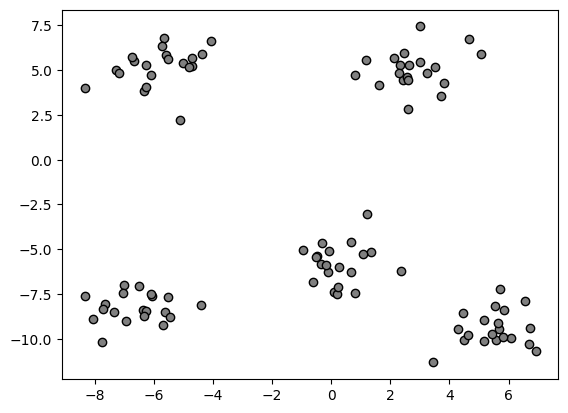

In [98]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [99]:
# k-means clustering
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5, 
             init='random', 
             max_iter=100, 
             random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_ 
print(label_kmc)

[2 4 3 1 0 2 2 3 0 2 3 2 0 1 0 2 4 1 0 2 2 1 4 3 2 2 1 0 3 4 1 1 0 1 2 0 3
 1 3 4 1 1 1 0 3 3 2 0 4 0 4 0 2 3 0 0 1 4 1 3 0 4 4 1 2 4 0 4 0 3 3 2 4 0
 1 1 3 4 2 2 0 0 4 1 4 3 1 3 1 3 4 3 2 4 4 4 3 2 2 3]


In [100]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [101]:
# 타겟 클래스 종류 확인
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


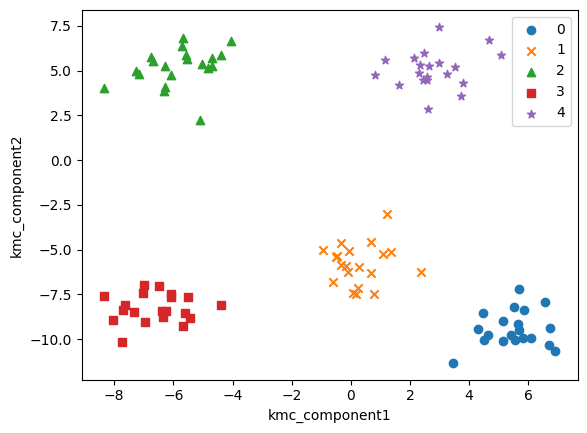

In [102]:
# k-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

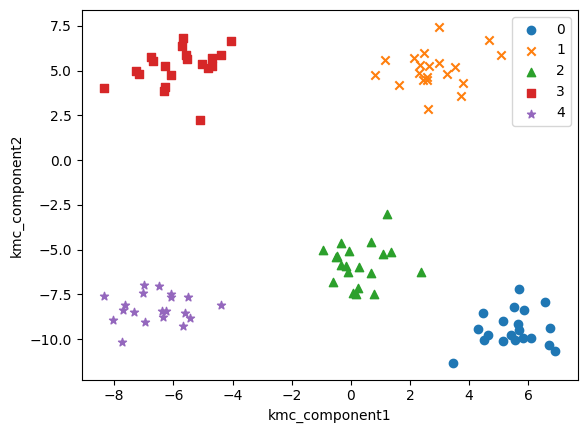

In [103]:
# 실제 타겟 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [104]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782
